# Introduction to Discrete Distributions

## Distributions



### Density Functions

Distrubtions are often described in terms of their density functions.

Two types of density functions are probability density functions and cumulative density functions.

* **Probability Density function** (PDF): calculates the probability of observing a given value.
* **Cumulative Density function** (CDF): calculates the probability of an observation equal or less than a value.

Both PDFs and CDFs are continuous functions. The equivalent of a PDF for a discrete distribution is called a probability mass function, or PMF. And similarly we have CMFs for the cumulative discrete-analogue.

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline

import numpy as np
import pandas as pd
import math

# import scipy.stats as stats
from scipy.stats import binom 
from scipy.stats import poisson

import random

## 1. Binomial Distribution

In [6]:
def binom_pmf(n,k,p):
    # calculates PMF of Binomial distribution
    # n= number of trials
    # k = number of succeses
    # p = probability of success k
    
    pmf = (math.factorial(n)/(math.factorial(k)*math.factorial(n-k)))*(p**k)*(1-p)**(n-k)
    return pmf

def binom_cmf(lower, upper, n, p):
    # calculates CMF of Binomial distribution
    # lower = min number of successful trials
    # upper = max number of successful trials
    # n = number of trials
    # p = probability of success
    cmf = 0
    for k in range(lower,upper+1):
        cmf += binom_pmf(n,k,p)
    return cmf

In [7]:
binom_cmf(0,4,20,0.2)

0.6296482639026698

In [8]:
binom_cmf(0,6,20,0.2)

0.9133074864326008

### Exact binomial test

In [9]:
### binomial test check example from Wikipedia: 'two tail'

In [26]:
binom_cmf(51,235,235,1/6)+binom_cmf(0,27,235,1/6)

0.04374797018240008

In [30]:
### one tail test example from wikipedia
binom_cmf(51,235,235,1/6)

0.026544245711691068

In [31]:
### example with 100 trials

In [29]:
1-binom_cmf(0,22,100,1/6) 

0.06305032696946788

In [68]:
binom_cmf(22,100,100,1/6)

0.10018347064058694

In [76]:
binom_cmf(22,100,100,1/6)

0.10018347064058694

In [73]:
binom_cmf(0,10,100,1/6)+binom_cmf(24,100,100,1/6)

0.08056005280043357

#### test with scipy stat

In [42]:
binom.pmf(23,100,1/6) # the same as binom_pmf(100,23,1/6)

0.025185958316060155

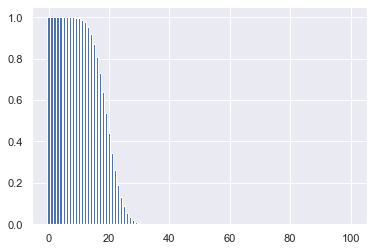

In [62]:
 # setting the values 
# of n and p 
n = 100
p = 1/5
# defining list of k values 
k_values = list(range(n + 1)) 
# list of pmf values 
# dist = [binom.pmf(k, n, p) for k in k_values ] 
dist = [1-binom_cmf(0, k, n, p) for k in k_values ] 
# plotting the graph  
plt.bar(k_values, dist) 
plt.show()
# binom_cmf(0,4,20,0.2)

## 2. Poisson Distribution


f(x) = exp(-λ) * (λ^x)/ x!


x = 0, 1, 2, . . . 

### Example 1.
Customers arrive at a travel agency at a mean rate
of 11 per hour. Assuming that the number of arrivals per
hour has a Poisson distribution, give the probability that
more than 10 customers arrive in a given hour.

Source: PROBABILITY AND STATISTICAL INFERENCE, Ninth Edition, Robert V. Hogg

In [11]:
# Solution:
    
# cumulative probability X <=10 
cumul_prob = poisson.cdf(10,11) # X<=10, lambda = 11

# probabiliy of X>=11:
1- cumul_prob

0.5401112973063131

### Example 2.
An airline always overbooks if possible. A particular
plane has 95 seats on a flight in which a ticket sells
for $300. The airline sells 100 such tickets for this flight.

(a) If the probability of an individual not showing up is
0.05, assuming independence, what is the probability
that the airline can accommodate all the passengers
who do show up?

(b) If the airline must return the 300 price plus a penalty of 400 
to each passenger that cannot get on the
flight, what is the expected payout (penalty plus ticket
refund) that the airline will pay?


Source: PROBABILITY AND STATISTICAL INFERENCE, Ninth Edition, Robert V. Hogg

In [12]:
# Solution:
# Here I will use Poisson distribution as a 
# good approximation of binomial distribution as n=100, and p=0.05.

# (a)
# lambda = probability*n=0.05*100
lam = 0.05*100
# We need to find that at least 5 people out of 100 booked will not how up. 
# P(X>=5) = 1 - P(X<=4)
# cumulative probability X >= 5  
1 - poisson.cdf(4,5) # X<=4, lambda = probability*n=0.05*100 = 5


0.5595067149347874

In [14]:
# (b)
# Airline will pay = 700 for each passenger who showed (when 96th, 97th, .. shows up)
# or when exactly 4,3,2,1,and 0 passengers did not show up:
pay = 1*700* poisson.pmf(4,5) + 2*700* poisson.pmf(3,5) + \
    3*700* poisson.pmf(2,5) + 4*700* poisson.pmf(1,5) + \
    5*700* poisson.pmf(0,5)
pay

614.1357941874774

### Exact solution with binomial pmf

In [16]:
# lets compare with binomial distribution
# a
1 - binom.cdf(4,100,0.05) # prob = binom.cdf(x, n, p)

0.5640186993142893

In [17]:
# b
# use binomial pmf:  prob = binom.pmf(x, n, p)
pay = 1*700* binom.pmf(4,100,0.05) + 2*700* binom.pmf(3,100,0.05) + \
    3*700*binom.pmf(2,100,0.05) + 4*700* binom.pmf(1,100,0.05) + \
    5*700* binom.pmf(0,100,0.05)
pay

598.5592756741634

We can try to answer the following question, what would be most economical number of ticket to sell to get the maximum expected profitability?

#### Situation when company always sells n tickets and receives full pay for booking 
(we use n=95 to n = 105 to find maximum expected profit)

Note: refund for no show up is not considered for this calculation

In [58]:
# Lets check for 100 tickets case
tickets = 100
seats = 95

initial = tickets*300 # company sells n tickets $300 each

penalty = 0 # initialize penalty
for x in range(1,(tickets-seats)+1):
    penalty += x*700* binom.pmf((tickets-seats-x),tickets,0.05)

expected_profit = initial - penalty 
initial, penalty, expected_profit

(30000, 598.5592756741634, 29401.440724325836)

In [76]:
# Now generalize for N tickets

def expected_prof(tickets):
    seats = 95

    initial = tickets*300 # company sells n tickets $300 each

    penalty = 0 # initialize penalty
    for x in range(1,(tickets-seats)+1):
        penalty += x*700* binom.pmf((tickets-seats-x),tickets,0.05)

    expected_profit = initial - penalty 
    print(tickets,round(expected_profit,2), round(penalty,2), round(initial,2))

In [77]:
for tickets in range(95,105+1):
    expected_prof(tickets)

95 28500 0 28500
96 28794.91 5.09 28800
97 29065.65 34.35 29100
98 29278.39 121.61 29400
99 29397.35 302.65 29700
100 29401.44 598.56 30000
101 29291.8 1008.2 30300
102 29087.39 1512.61 30600
103 28814.61 2085.39 30900
104 28498.24 2701.76 31200
105 28156.93 3343.07 31500


In [78]:
# 100 tickets gives the maximum expected profit

#### Situation when only showed up passengers are charged for tickets

In [44]:
### Situation when only showed up passengers are charged for tickets

def expected_prof(n):
    price = 300
    penalty = 300 + 400

    expected = 0
    for x in range(0,n+1):
        if x <= 95:
            profit = 300 * x
        else:
            profit = 300 * x - (x - 95) * penalty
        prob = binom.pmf(x,n,1 - 0.05) # probability that x people out of 100 will show up
        expected += profit * prob # expected profitability
    return expected

In [40]:
binom.pmf(95,100,1 - 0.05)

0.18001782727043672

In [43]:
for n in range(95,106):
    print(n,round(expected_prof(n),2))

95 27075.0
96 27354.91
97 27610.65
98 27808.39
99 27912.35
100 27901.44
101 27776.8
102 27557.39
103 27269.61
104 26938.24
105 26581.93


In [80]:
# 99 tickets gives the maximum expected profit, when only showed up bookings are charged